# Devils DFTD 2-Stage Infection

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../GillesPy2')))

In [2]:
import time
import json
import pickle

In [3]:
from gillespy2 import TauHybridCSolver

In [4]:
from dask.distributed import Client
from dask import delayed

In [5]:
from Devils_DFTD_2_Stage_Infection import DevilsDFTD2StageInfection
from Simulation import Simulation, devil_pop
from ParameterSweep import ParameterSweep

In [6]:
# c = Client(n_workers=8, threads_per_worker=1)
c = Client("james.cs.unca.edu:12345")

OSError: Timed out trying to connect to tcp://james.cs.unca.edu:12345 after 30 s

## With Immunity + Vaccination Interventions
### Load existing state

In [ ]:
imvc_state_path = "DevilsDFTD2StageInfectionWithImmunityAndVaccinationState.p"
if os.path.exists(imvc_state_path):
    with open(imvc_state_path, "rb") as imvc_state_file:
        imvc_state = pickle.load(imvc_state_file)
    
    # Model
    imvc_model = imvc_state['model']
    # Simulation
    imvc_sim = Simulation.load_state(imvc_state['sim'])
    # Parameter Sweep Job
    imvc_job = ParameterSweep.load_state(imvc_state['job'], batch_size=150, statefile=imvc_state_path)
else:
    imvc_state = None
    print("No existing immunity + vaccination state found.")
    
    # Model
    imvc_model = DevilsDFTD2StageInfection(devil_pop, interventions=["immunity", "vaccination"])
    # Simulation
    imvc_sim = Simulation(model=imvc_model)
    # Parameter Sweep Job
    imvc_job = ParameterSweep(model=imvc_model)

### Solver

In [ ]:
imvc_sol = delayed(TauHybridCSolver)(model=imvc_model, variable=True, delete_directory=False)

### Simulation

In [ ]:
imvc_sim.configure(solver=imvc_sol)
%time _ = imvc_sim.run(use_existing_results=True)

In [ ]:
imvc_sim.output_dftd_devils_probs(print_probs=True)

### Visualize Simulation Results

In [ ]:
imvc_sim.plot()

### Parameter Sweep
- immunity_start: [384, 444, 504]
- vaccinated_infection_rate: [0.1, 0.2, 0.4, 0.6]
- vaccination_proportion: [0.6, 0.8, 1.0]
- vacc_program_length: [3, 5, 6, 7, 8, 9, 10, 11]
- vaccine_frequency: [2, 4, 6]

In [ ]:
imvc_params = [
    {"parameter": "immunity_growth_rate", "range": [0.005, 0.0075, 0.01]},
    {"parameter": "immunity_max_level", "range": [50, 70, 100]},
    {"parameter": "immunity_start", "range": [384, 444, 504]},
    {"parameter": "vaccinated_infection_rate", "range": [0.1, 0.2, 0.4, 0.6]},
    {"parameter": "vaccination_proportion", "range": [0.6, 0.8, 1.0]},
    {"parameter": "vacc_program_length", "range": [3, 5, 6, 7, 8, 9, 10, 11]},
    {"parameter": "vaccine_frequency", "range": [2, 4, 6]}
]

In [ ]:
%time imvc_job.run(solver=imvc_sol, params=imvc_params)

### Visualize Parameter Sweep Results

In [ ]:
# res_sub_keys=["immunity_start:444", "immunity_growth_rate:0.01", "immunity_max_level:100",
#               "vaccine_frequency:6", "vaccination_proportion:0.8", "vaccinated_infection_rate:0.6"]
res_sub_keys=["immunity_start:444", "immunity_growth_rate:0.01",
              "vaccine_frequency:6", "vaccination_proportion:0.8", "vaccinated_infection_rate:0.6"]
imvc_job.plot_devil_dftd_extinction_over_param(
    res_sub_keys=res_sub_keys, key="vacc_program_length", param_label="Vaccine Program Length", units="years"
)

In [ ]:
imvc_job.explore_results()

### Store Immunity State

In [ ]:
imvc_state = {"model": imvc_model, "sim":imvc_sim, "job":imvc_job}
with open(imvc_state_path, "wb") as imvc_state_file:
    pickle.dump(imvc_state, imvc_state_file)

## With Immunity + Culling Interventions
### Load existing state

In [ ]:
imcl_state_path = "DevilsDFTD2StageInfectionWithImmunityAndCullingState.p"
if os.path.exists(imcl_state_path):
    with open(imcl_state_path, "rb") as imcl_state_file:
        imcl_state = pickle.load(imcl_state_file)
        
    # Model
    imcl_model = imcl_state['model']
    # Simulation
    imcl_sim = Simulation.load_state(imcl_state['sim'])
    # Parameter Sweep Job
    imcl_job = ParameterSweep.load_state(imcl_state['job'], batch_size=150, statefile=imcl_state_path)
else:
    imcl_state = None
    print("No existing immunity + culling state found.")

    # Model
    imcl_model = DevilsDFTD2StageInfection(devil_pop, interventions=["immunity", "culling"])
    # Simulation
    imcl_sim = Simulation(model=imcl_model)
    # Parameter Sweep Job
    imcl_job = ParameterSweep(model=imcl_model, batch_size=150, statefile=imcl_state_path)

### Solver

In [ ]:
imcl_sol = delayed(TauHybridCSolver)(model=imcl_model, variable=True, delete_directory=False)

### Simulation

In [ ]:
imcl_sim.configure(solver=imcl_sol)
%time _ = imcl_sim.run(use_existing_results=True)

In [ ]:
imcl_sim.output_dftd_devils_probs(print_probs=True)

### Visualize Simulation Results

In [ ]:
imcl_sim.plot()

### Parameter Sweep
- immunity_growth_rate: [0.005, 0.0075, 0.01]
- immunity_max_level: [50, 70, 100]
- immunity_start: [384, 444, 504]
- cull_rate_diseased: [0.25, 0.5, 0.75]
- cull_program_length: [3, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
imcl_params = [
    {"parameter": "immunity_growth_rate", "range": [0.005, 0.0075, 0.01]},
    {"parameter": "immunity_max_level", "range": [50, 70, 100]},
    {"parameter": "immunity_start", "range": [384, 444, 504]},
    {"parameter": "cull_rate_diseased", "range": [0.25, 0.5, 0.75]},
    {"parameter": "cull_program_length", "range": [3, 5, 6, 7, 8, 9, 10, 11]}
]

In [ ]:
%time imcl_job.run(solver=imcl_sol, params=imcl_params)

### Visualize Parameter Sweep Results

In [ ]:
# res_sub_keys=["immunity_start:444", "immunity_growth_rate:0.01",
#               "immunity_max_level:100", "cull_rate_diseased:0.5"]
res_sub_keys=["immunity_start:444", "immunity_growth_rate:0.01", "cull_rate_diseased:0.5"]
imcl_job.plot_devil_dftd_extinction_over_param(
    res_sub_keys=res_sub_keys, key="cull_program_length", param_label="Culling Program Length", units="years"
)

In [ ]:
imcl_job.explore_results()

### Store Vaccination State

In [ ]:
imcl_state = {"model": imcl_model, "sim":imcl_sim, "job":imcl_job}
with open(imcl_state_path, "wb") as imcl_state_file:
    pickle.dump(imcl_state, imcl_state_file)

## With Vaccination + Culling Interventions
### Load existing state

In [7]:
vccl_state_path = "DevilsDFTD2StageInfectionWithVaccinationAndCullingState.p"
if os.path.exists(vccl_state_path):
    with open(vccl_state_path, "rb") as vccl_state_file:
        vccl_state = pickle.load(vccl_state_file)
        
    # Model
    vccl_model = vccl_state['model']
    # Simulation
    vccl_sim = Simulation.load_state(vccl_state['sim'])
    # Parameter Sweep Job
    vccl_job = ParameterSweep.load_state(vccl_state['job'], batch_size=150, statefile=vccl_state_path)
else:
    vccl_state = None
    print("No existing vaccination + culling state found.")

    # Model
    vccl_model = DevilsDFTD2StageInfection(devil_pop, interventions=["vaccination", "culling"])
    # Simulation
    vccl_sim = Simulation(model=vccl_model)
    # Parameter Sweep Job
    vccl_job = ParameterSweep(model=vccl_model, batch_size=150, statefile=vccl_state_path)

### Solver

In [ ]:
vccl_sol = delayed(TauHybridCSolver)(model=vccl_model, variable=True, delete_directory=False)

### Simulation

In [ ]:
vccl_sim.configure(solver=vccl_sol)
%time _ = vccl_sim.run(use_existing_results=True)

In [ ]:
vccl_sim.output_dftd_devils_probs(print_probs=True)

### Visualize Simulation Results

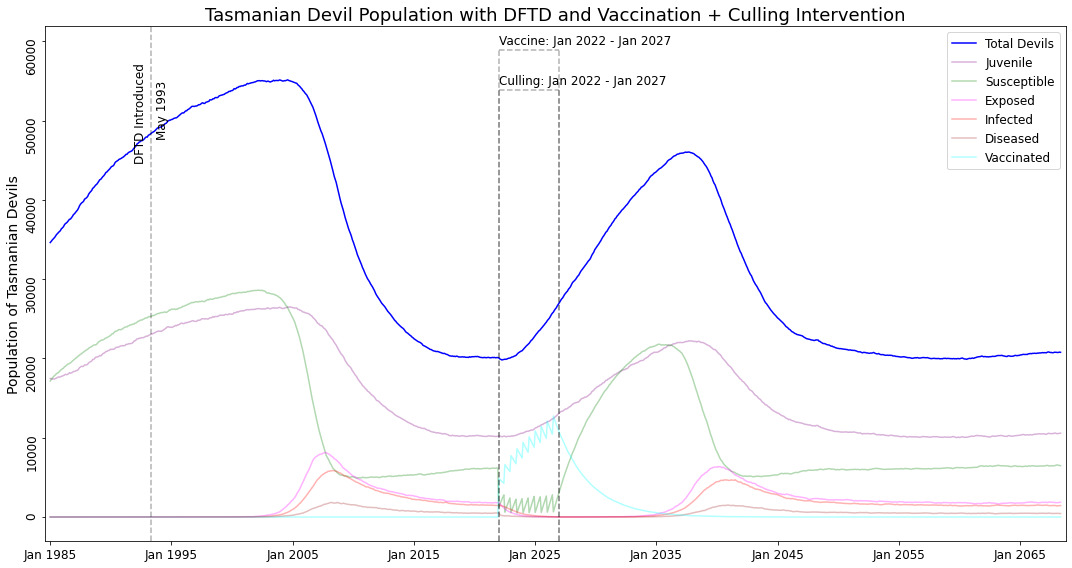

In [8]:
vccl_sim.plot()

### Parameter Sweep

In [ ]:
params = [
    {"parameter": "vaccinated_infection_rate", "range": [0.1, 0.2, 0.4, 0.6]},
    {"parameter": "vaccination_proportion", "range": [0.6, 0.8, 1.0]},
    {"parameter": "vacc_program_length", "range": [3, 5, 6, 7, 8, 9, 10, 11]},
    {"parameter": "vaccine_frequency", "range": [2, 4, 6]},
    {"parameter": "cull_rate_diseased", "range": [0.25, 0.5, 0.75]},
    {"parameter": "cull_program_length", "range": [3, 5, 6, 7, 8, 9, 10, 11]}
]
total_param_points = 1
for param in params:
    total_param_points *= len(param['range'])
print(f"Size of the Parameter Space: {total_param_points}")

In [ ]:
new_params = vccl_job.params != params
%time vccl_job.run(solver=vccl_sol, params=params)

### Visualize Parameter Sweep Results

In [ ]:
res_sub_keys=["vaccine_frequency:6", "vaccination_proportion:0.8", "vaccinated_infection_rate:0.6",
              "cull_rate_diseased:0.5", "cull_program_length:5"]
vccl_job.plot_devil_dftd_extinction_over_param(
    res_sub_keys=res_sub_keys, key="vacc_program_length", param_label="Vaccine Program Length", units="years"
)

In [9]:
vccl_job.explore_results()

Output()

### Store Culling State

In [ ]:
vccl_state = {"model": vccl_model, "sim":vccl_sim, "job":vccl_job}
with open(vccl_state_path, "wb") as vccl_state_file:
    pickle.dump(vccl_state, vccl_state_file)

In [ ]:
tmp_state_path = f"tmp_result_state/{vccl_state_path}-3"
with open(tmp_state_path, "rb") as tsf:
    new_res = pickle.load(tsf)
vccl_job.results = new_res